In [1]:
import importlib
import os
import random
import time

import import_ipynb
import numpy as np
import pandas as pnd
import requests
import seaborn as sns
from boardgamegeek import BoardGameGeek
from langdetect import detect
from tqdm.notebook import tqdm

import BggDbGetter as BDG
import BggDbScraper as BDS
import BggHelper as BH
import Cicero as Cic
import Glossa as glos

importing Jupyter notebook from BggDbGetter.ipynb
importing Jupyter notebook from BggDbScraper.ipynb
importing Jupyter notebook from BggHelper.ipynb
importing Jupyter notebook from Cicero.ipynb
importing Jupyter notebook from Glossa.ipynb


# Step 1

Access BBG API's to download game and user preferences data.
Define criterion used for setting the parameters that drive the download in termis of the variables defining the dataset, such collecting games only for a specified period or a specified set of categories. The wider the game collection, the better.

In [2]:
helper = BH.BggHelper()
new_df = helper.bgg_start(get=False, scrape=False)

#### Dataframe reading

In [3]:
df = pnd.read_csv("BGG_sampled.csv")
df.shape
dfh = df

In [4]:
gls = glos.Glossa(dfh, "en")
cicero = Cic.Cicero(gls)

In [5]:
cicero = cicero.clean_lemming("description")

Glossa.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "from tqdm.notebook import tqdm\n",


Glossa.ipynb:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "class Glossa:\n",
Glossa.ipynb:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "            word.replace(\"'\", \"\")\n",


In [6]:
cicero = cicero.clean_lemming("categories")

In [7]:
#cicero = cicero.eng_lemming("name")
cicero = cicero.eng_lemming("publishers")

In [8]:
cicero = cicero.eng_lemming("families")

In [9]:
cicero.get_df()#["families"][0]

,Unnamed: 0,boardgame_rank,id,families,categories,mechanics,designers,artists,publishers,description,...,minage,name,usersrated,average,bayesaverage,stddev,owned,numweights,averageweight,ranks
0,0,1,174430,campaign game component miniature crowdfunding...,adventure exploration fantasy fighting miniature,"['Action Retrieval', 'Campaign / Battle Card D...",['Isaac Childres'],"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...",cephalofair game albi asmodee feuerland spiele...,gloomhaven game euro-inspired tactical combat ...,...,12,Gloomhaven,35214,8.82880,8.57349,1.60782,56587,1517,3.8266,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
1,2,3,167791,`` fryxgames future timeline player count gam...,economic environmental industry manufacturing ...,"['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['Jacob Fryxelius'],['Isaac Fryxelius'],fryxgames arclight fantasmagoria ghenos game i...,2400s mankind begin terraform planet mar giant...,...,12,Terraforming Mars,54325,8.42658,8.27621,1.37770,71449,2168,3.2366,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
2,3,4,224517,brass city birmingham england country england ...,economic industry manufacturing transportation,"['Connections', 'Hand Management', 'Income', '...","['Gavan Brown', 'Matt Tolman', 'Martin Wallace']","['Lina Cossette', 'David Forest', 'Damien Mamm...",roxley boardm factory conclave editora crowd g...,brass birmingham economic strategy game sequel...,...,14,Brass: Birmingham,12955,8.63598,8.27537,1.25023,19468,599,3.9299,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
3,5,6,233078,4x game component miniature twilight imperium,civilization economic negotiation political sc...,"['Action Drafting', 'Area Majority / Influence...","['Dane Beltrami', 'Corey Konieczka', 'Christia...",['Scott Schomburg'],fantasy flight game adc blackfire entertainmen...,twilight imperium fourth edition game galactic...,...,14,Twilight Imperium (Fourth Edition),10718,8.68625,8.20355,1.59923,13439,473,4.2199,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
4,6,7,187645,component miniature movie star war,civil war fighting miniature movie tv radio th...,"['Area Majority / Influence', 'Area Movement',...",['Corey Konieczka'],"['Matt Allsopp', 'David Ardila', 'Balaskas', '...",fantasy flight game adc blackfire entertainmen...,star war rebellion board game epic conflict ga...,...,14,Star Wars: Rebellion,20328,8.42316,8.15695,1.37843,30600,685,3.6934,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11826,14109,18909,4724,admin better description needed author j.r.r t...,adventure fantasy movie tv radio theme novel-b...,"['Modular Board', 'Roll / Spin and Move']",['Terry Miller Associates'],[],roseart,relive adventure fellowship ring board game fa...,...,8,The Lord of the Rings: The Fellowship of the Ring,224,3.23018,5.18513,1.99998,470,28,1.4286,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
11827,14110,18913,4077,tv series tv game show tv series want millionaire,movie tv radio theme party game trivia,['Push Your Luck'],['(Uncredited)'],[],unknown alga celador danspil diset s. a. hasbr...,player answer multiple-choice trivia question ...,...,10,Who Wants to Be a Millionaire,827,4.62736,5.17503,1.67047,1456,67,1.4478,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
11828,14111,18924,12205,gamewright port-a-party series,party game word game,"['Hand Management', 'Storytelling']","['Joyce Johnson', 'Colleen McCarthy-Evans']",['David Semple'],gamewright paul lamond game ltd,sofa fit shopping cart depends size game creat...,...,10,In a Pickle,1302,4.69489,5.09240,1.67115,3197,86,1.2093,"[{'name': 'boardgame', 'friendlyname': 'Board ..."
11829,14112,18935,3990,,card game party game trivia,"['Card Drafting', 'Memory']",['(Uncredited)'],[],imagination game megableu spin master ltd. uni...,basic trivia game player try figure statement ...,...,12,Fact or Crap,621,3.83101,5.00412,1.63167,1474,34,1.20

# Step 2

Pre-process game text (title and description) in order to define the terms to include in the variables to be observed, eventually using a word embedding model to normalize and/or expand the terminology extracted from the game description.

## Followed  this url:
### https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92


<div class="mark">
    TODO: Everything done until now is fine, yet there are some issues and here lies the solution
</div><i class="fa fa-lightbulb-o "></i>
<ul>
    <li>The corpus is made of N rows</li>
    <li>Each rows has a variable number of words M
        <ul>
            <li>Train W2V with overall corpus</li>
            <li>Extract from each row the top relevant words via Sklearn's TF-IDF</li>
            <li>Embed via W2V the top relevant words into a matrix of dimension XxD</li>
            <li>Use python's transfromer to compress them into a vector of dimension D'</li>
        </ul>
    </li>
    <li>Create a Neural network with input size XxD' and train it</li>
    <li>Find the correlation during testing time (remember to cross-validate)</li>
    <li>????</li>
    <li>Profit</li>
</ul>

#### Need to create a column in the dataframe containing all the important words in the row. <br> This takes into account Name, description, mechanics, families and publishers

In [10]:
df.columns

Index(['Unnamed: 0', 'boardgame_rank', 'id', 'families', 'categories',
       'mechanics', 'designers', 'artists', 'publishers', 'description',
       'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minage',
       'name', 'usersrated', 'average', 'bayesaverage', 'stddev', 'owned',
       'numweights', 'averageweight', 'ranks'],
      dtype='object')

In [11]:
model, corpus = cicero.word2vec_train(["description", "mechanics", "categories", "families", "publishers"])

corpus

In [12]:
## Pass to Pitagora class text corpus and model
## Pitagora will return a vector of dimension D'

import Pitagora as ptg
import importlib

importlib.reload(ptg)
pitagora = ptg.Pitagora(corpus, model)

importing Jupyter notebook from Pitagora.ipynb
importing Jupyter notebook from Pitagora.ipynb


In [13]:
cps = pitagora.topwords_extraction(quantity=20)

models = []
for index, row in tqdm(cicero.get_df().iterrows()):
    models.append(
        (row["name"], model[row["name"]]))

In [14]:
#cps, len(cps)

In [15]:
j = 0
variables = cicero.get_df()
trainset = []
for element in tqdm(cps):
    trainset.append((element, variables.loc[j, ["name", "boardgame_rank", "averageweight", "average"]]))
    j += 1
#variables.loc[j, ["name", "id"]][1]#[["name", "id"]]

In [16]:
(trainset[0][1])

name              Gloomhaven
boardgame_rank             1
averageweight         3.8266
average               8.8288
Name: 0, dtype: object

In [17]:
embeddings = []
i = 0
quantity = 20

In [18]:
for element in tqdm(trainset):
    foster_element = []
    try:
        for word in element[0]:
            foster_element.append(model[word].tolist())
        if len(foster_element) < quantity:
            foster_element = []
        else:
            embeddings.append((foster_element, element[1]))
    except:
        print("Absent word: ", word, " - From game: ", element[1])
        i += 1
        pass

Absent word:  hits  - From game:  name              Star Wars: X-Wing Miniatures Game – The Force ...
boardgame_rank                                                  389
averageweight                                                2.8333
average                                                     7.85615
Name: 281, dtype: object

/home/tore/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """



Absent word:  points  - From game:  name              1846: The Race for the Midwest
boardgame_rank                               445
averageweight                             4.0265
average                                  7.98339
Name: 326, dtype: object
Absent word:  results  - From game:  name              Armageddon War: Platoon Level Combat in the En...
boardgame_rank                                                 5887
averageweight                                                3.1429
average                                                     8.27455
Name: 4081, dtype: object
Absent word:  abstratus  - From game:  name              Abstratus
boardgame_rank         9540
averageweight             1
average             8.33805
Name: 6441, dtype: object
Absent word:  kathai  - From game:  name               Kathai
boardgame_rank      11667
averageweight      1.7647
average           5.78214
Name: 7795, dtype: object
Absent word:  moneybags  - From game:  name              Moneyba

In [19]:
len(embeddings), len(embeddings[0]), len(embeddings[0][0]), len(embeddings[0][0][0]), quantity ** 2

(11746, 2, 20, 100, 400)

### Once "embeddings" has been obtained, it must be compressed via a transformer
##### Each list contains 10 words, post embedding each word becomes a list of 100 values. 
100 values * 10 words = 1000 values <br>

Two possible paths: <br>
1] Neural network with 1000 neurons as input layers [OUT OF QUESTION]<br>
2] Compression of each 10 terms of 100 values each into one single vector of length D', in order to make an input layer of D' neurons [FEASIBLE WITH SKLEARN.DECOMPOSITION'S PCA IMPLEMENTATION]-> No! Use Autoencoder with NN! <br>



In [20]:
#%reload_ext autoreload
#%autoreload 2

import Athena
import importlib


importing Jupyter notebook from Athena.ipynb


Using TensorFlow backend.


In [21]:
importlib.reload(Athena)

importing Jupyter notebook from Athena.ipynb


<module 'Athena' from 'Athena.ipynb'>

In [22]:
model_rank = Athena.Athena(embeddings).make_model_rank().get_model_rank()

MAKE RANK!
Input layer:  2000
Metrics:  [<keras.metrics.MeanMetricWrapper object at 0x7f48946c3e50>, <keras.metrics.MeanMetricWrapper object at 0x7f48946c3190>, <keras.metrics.MeanMetricWrapper object at 0x7f48946c3890>]


In [23]:
model_classic_vote = Athena.Athena(embeddings).make_model_classic().get_model_classic()

MAKE CLASSIC!
Input layer:  2000
Metrics:  [<keras.metrics.MeanMetricWrapper object at 0x7f489457f110>, <keras.metrics.MeanMetricWrapper object at 0x7f489457f990>, <keras.metrics.MeanMetricWrapper object at 0x7f489457f8d0>]


In [24]:
model_classic_weigth = Athena.Athena(embeddings).make_model_classic().get_model_classic()

MAKE CLASSIC!
Input layer:  2000
Metrics:  [<keras.metrics.MeanMetricWrapper object at 0x7f48944864d0>, <keras.metrics.MeanMetricWrapper object at 0x7f4894486710>, <keras.metrics.MeanMetricWrapper object at 0x7f48944863d0>]


In [43]:
j = 0
x, x_elem = [], []#np.array([]), []
#y = np.array([])
y_rank, y_weigth, y_vote = [], [], []
for i in tqdm(embeddings):
    #y = np.concatenate(y, np.array([i[1]]))
    #y.append(i[1][1:])
    y_rank.append(i[1][1])
    y_weigth.append(i[1][2])
    y_vote.append(i[1][3])
    #change here from 20 to 10
    while j < 20:
        x_elem += i[0][j]
        j += 1
    #x = np.concatenate(x, np.array(x_elem))
    x.append(np.array(x_elem))
    x_elem = []
    j = 0
#i = embeddings[0][0]
#i

/home/tore/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [44]:
rankmax = max(y_rank)
#y_rank = list(map(lambda y: y/rankmax, y_rank))
y_weigth = list(map(lambda y: y*(1/5), y_weigth))
y_vote = list(map(lambda y: y/10, y_vote))

In [45]:
len(x), len(y_rank), len(embeddings)

(11746, 11746, 11746)

In [46]:
from sklearn.model_selection import train_test_split  

In [47]:
x_rank_train, x_rank_test, y_rank_train, y_rank_test = train_test_split(np.array(x),
                                                    np.array(y_rank), 
                                                    train_size=0.70, 
                                                    test_size=0.30)

In [48]:
x_w_train, x_w_test, y_w_train, y_w_test = train_test_split(np.array(x),
                                                    np.array(y_weigth), 
                                                    train_size=0.70, 
                                                    test_size=0.30)

In [49]:
x_v_train, x_v_test, y_v_train, y_v_test = train_test_split(np.array(x),
                                                    np.array(y_vote), 
                                                    train_size=0.70, 
                                                    test_size=0.30)

In [50]:
#np.shape(y_train)
#(x_train[0])
#(y_test)
#x_test, y_test

In [51]:
#model_2, model_3 = model.get_model(), model.get_model()

In [52]:
import extra_keras_metrics
import keras.utils
import numpy as np
import tensorflow as tf
from keras import backend as B
from keras.layers import BatchNormalization, Dense
from keras.models import Sequential
from keras_tqdm import TQDMNotebookCallback as ktqdm
from matplotlib import pyplot as plt
from plot_keras_history import plot_history
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
#from tensorflow.python.keras.metrics import Metric
from tqdm import tqdm_notebook as tqdm

In [35]:
"""history = model_2.fit(x_train,
                      y_train,
                      epochs=100,
                      shuffle=True,
                      batch_size=32,
                      verbose=0,
                      callbacks=[ktqdm(metric_format="{name}: {value:e}")],
                      validation_data=(x_test, y_test)
                     )"""

'history = model_2.fit(x_train,\n                      y_train,\n                      epochs=100,\n                      shuffle=True,\n                      batch_size=32,\n                      verbose=0,\n                      callbacks=[ktqdm(metric_format="{name}: {value:e}")],\n                      validation_data=(x_test, y_test)\n                     )'

In [42]:
np.shape(x_rank_train)

(8222, 1000)

In [53]:
history_rank = model_rank.fit(x_rank_train,
                      y_rank_train,
                      epochs=100,
                      shuffle=True,
                      batch_size=32,
                      verbose=0,
                      callbacks=[ktqdm(metric_format="{name}: {value:e}")],
                      validation_data=(x_rank_test, y_rank_test)
                     )

In [54]:
history_weigth = model_classic_weigth.fit(x_w_train,
                      y_w_train,
                      epochs=100,
                      shuffle=True,
                      batch_size=32,
                      verbose=0,
                      callbacks=[ktqdm(metric_format="{name}: {value:e}")],
                      validation_data=(x_w_test, y_w_test)
                     )

In [55]:
history_vote = model_classic_vote.fit(x_v_train,
                      y_v_train,
                      epochs=100,
                      shuffle=True,
                      batch_size=32,
                      verbose=0,
                      callbacks=[ktqdm(metric_format="{name}: {value:e}")],
                      validation_data=(x_v_test, y_v_test)
                     )

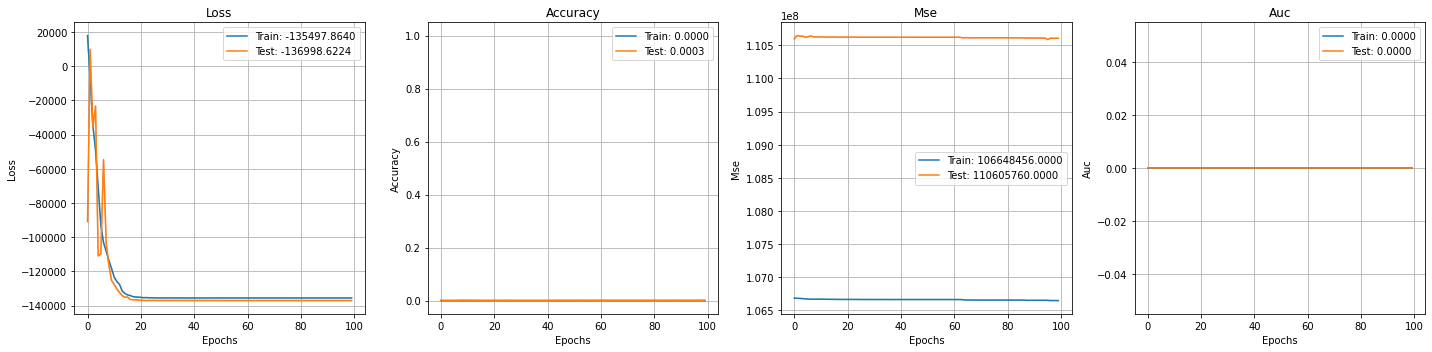

In [56]:
from plot_keras_history import plot_history

def plot_history_graph(history, index, label):
    """Plot the graph for the given history metrics."""
    plt.plot(history.history[index], label='Training %s = %0.6f' % (label, history.history[index][-1]))
    plt.plot(history.history['val_%s'%index] , label='Testing %s = %0.6f' % (label, history.history['val_%s'%index][-1]))
    plt.title('Model %s'%label, fontsize=15)
    plt.ylabel(label)
    plt.xlabel('epoch')
    plt.legend(loc='upper right')

plot_history(history_rank.history)

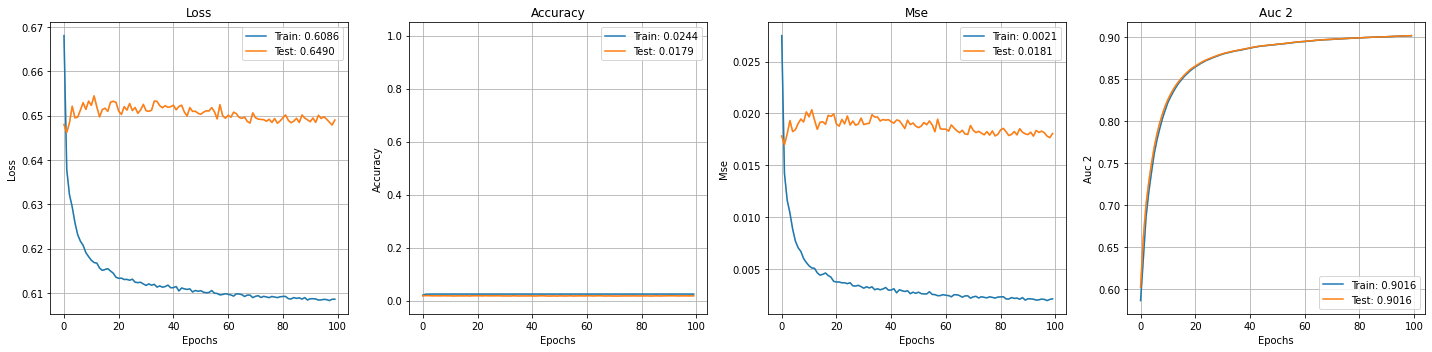

In [57]:
plot_history(history_weigth.history)

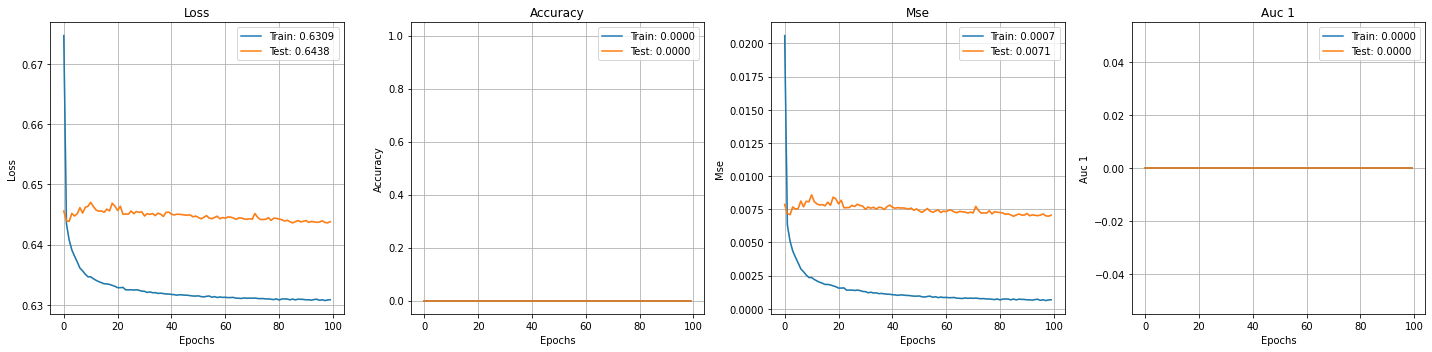

In [58]:
plot_history(history_vote.history)

In [ ]:
#history = model.train_model(x_train[0], y_train[0], x_test[0], y_test[0])

## Step 3
Perform a correlation analysis of the variables. On top of this, try to design and implement a model for predicting the "subjective" variable values starting from the "objective" variables. Optionally, define a recommendation system for games.

## Variables to be observed:

<table style="width:100%">
  <tr>
    <th>Objective</th>
    <th>Subjective</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>User rating</td>
  </tr>
  <tr>
    <td>Description</td>
    <td>Average</td>
  </tr>
  <tr>
    <td>Categories</td>
    <td>Average Weight</td>
  </tr>
  <tr>
    <td>Families</td>
    <td>Owned</td>
  </tr>
  <tr>
    <td>Publishers</td>
    <td>Rank</td>
  </tr>
  <tr>
    <td>Mechanics</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
  </tr>
</table>

 ##### Embeddings is shaped as a list of lists, each containing both the overall embeddings and the corresponding subjective informations about the game.
Each list contains a 100-dimensional list 

## Step 4
Include in the paper a report describing the output of Step 3